# COURSE: PCA and multivariate neural signal processing
## SECTION: Linear algebra crash course
### VIDEO: Python: Eigendecomposition and SVD (work file)
#### Instructor: sincxpress.com

In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


---
# Eigendecomposition
---


In [23]:
# This cell shows a geometric picture of eigenvectors in 2D.
#  Notice that the two red lines (v and Av) are collinear, 
#  but not the two black lines (w and Aw). v is an eigenvector, w is not.



# matrix
A = [ [1,5], [2,4] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals[0])


[-1.  6.]


In [24]:
# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector!
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
myNorm = np.linalg.norm(v2)
v2 = v2/myNorm# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2

C:\Users\Rob\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\Rob\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


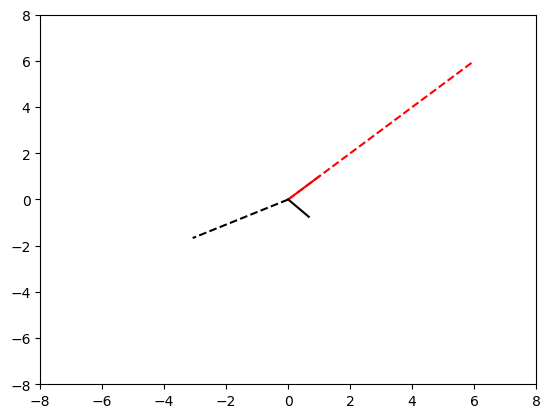

In [18]:
# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')

plt.axis([-8,8,-8,8])
plt.show()


# QUESTION: Is there something special about vector v? To find out,
#           change one value of matrix A.

In [25]:
### eigenvectors of symmetric matrices

# create a random matrix
A = np.random.randn(14,14)

# make it symmetric
S = A.T@A

# diagonalize it
evals,evecs = np.linalg.eig(S)


# magnitudes of each vector
print( np.sqrt( sum(evecs**2) ) )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


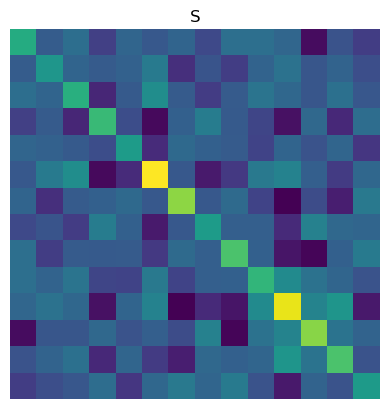

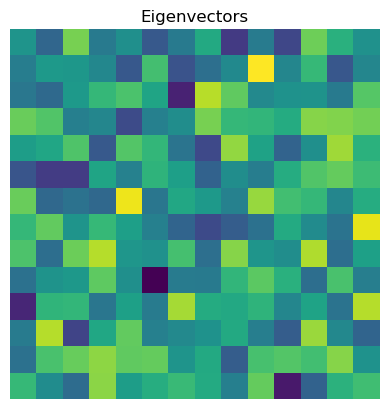

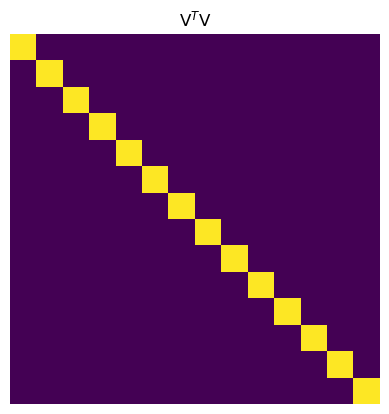

In [26]:
# and make plots
plt.imshow(S)
plt.axis('off')
plt.title('S')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs.T@evecs)
plt.axis('off')
plt.title('V$^T$V')
plt.show()


#   QUESTION: If VtV = I, then Vt = V^-1. How can you verify this in Python?
# 

In [27]:
# side note about the eig() function

# numpy's eig output is different from MATLAB's eig output
# numpy returns a tuple with the first element being a vector of eigenvalues, 
# and the second element the matrix of eigenvectors
lambdas = np.linalg.eig(S)
print(len(lambdas))
print(lambdas)

# To diagonalize:
eigvals,eigvecs = np.linalg.eig(S)
print(' ')
np.diag(eigvals)

2
(array([4.70671872e+01, 3.24102983e+01, 2.63836757e+01, 1.68464143e+01,
       1.53281160e+01, 1.21393128e+01, 8.98939405e+00, 5.67064365e+00,
       4.77699214e+00, 4.04757999e+00, 1.68669666e+00, 4.36208718e-01,
       2.41912435e-04, 1.29168296e-01]), array([[-0.02603331, -0.2788849 ,  0.35410695, -0.1767044 , -0.0537574 ,
        -0.35241889, -0.17315238,  0.09769283, -0.49948147, -0.16389874,
        -0.43966292,  0.33056114,  0.13269484, -0.04228624],
       [-0.15550001,  0.00521421, -0.00924887, -0.10003846, -0.356399  ,
         0.22748222, -0.37962001, -0.23057881, -0.08170628,  0.63235654,
        -0.10693504,  0.18082676, -0.35814775, -0.10343612],
       [-0.1897068 , -0.26263428,  0.00408388,  0.17941719,  0.24534008,
         0.06514995, -0.59813091,  0.48743117,  0.30193168, -0.09122783,
        -0.03656944, -0.0291198 , -0.16639619,  0.27144634],
       [ 0.3224417 ,  0.26400545, -0.1410853 , -0.10426877, -0.41780072,
        -0.13481959, -0.060178  ,  0.3524133 ,  0

array([[4.70671872e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.24102983e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.63836757e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.68464143e+01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.000

C:\Users\Rob\AppData\Local\Temp\ipykernel_34604\1523194484.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  evals = np.zeros((nIter,matsize),dtype=np.complex)


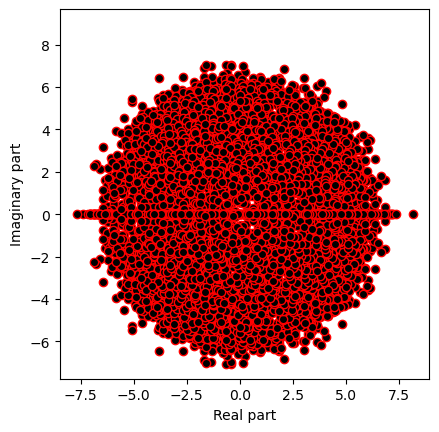

In [29]:
# some fun with random matrices

# Random matrices tend to have complex eigenvalues
# Those eigenvalues form a circle in the complex plane.

nIter = 150
matsize = 40
evals = np.zeros((nIter,matsize),dtype=np.complex)

for i in range(nIter):
    # create a random matrix
    X = np.random.randn(matsize,matsize)
    
    # extract its eigenvalues
    evals[i,:] = np.linalg.eig(X)[0]
    


plt.plot(np.real(evals),np.imag(evals),'ro',markerfacecolor='k')
plt.xlabel('Real part'), plt.ylabel('Imaginary part')
plt.axis('square')
plt.show()

# Note: This is just a fun FYI; no practical applications for this course.

---
# Singular value decomposition (SVD)
---

In [31]:
# Here we will show that eigendecomposition and SVD are the same thing for
# symmetric matrices (they are *not* the same for other kinds of matrices;
# this is an example of a special property of symmetric matrices).

# create a symmetric matrix
X = np.random.randn(5,5)
S = X.T@X

# take its eigendecomposition
L_eig,W_eig = np.linalg.eig(S)

# take its SVD
U_svd,S_svd,V_svd = np.linalg.svd(S)


# If they are identical, their difference should be zero:
np.round( W_eig - U_svd ,4)

# deffo not zero...

array([[-0.    , -0.1831, -0.    , -0.4962,  0.4962],
       [ 0.    ,  1.1615,  0.    ,  0.7569, -0.7569],
       [ 0.    , -1.4327, -0.    ,  0.3397, -0.3397],
       [ 0.    ,  0.4482,  0.    ,  0.2645, -0.2645],
       [ 0.    ,  0.6032,  0.    , -0.9977,  0.9977]])

In [32]:
print( np.vstack( (L_eig,S_svd) ).T)
# ah, they need to be sorted ;)

sidx = np.argsort(L_eig)[::-1]

# now try again:
print(' ')
print( np.vstack( (L_eig[sidx],S_svd) ).T)

[[12.52232479 12.52232479]
 [ 6.59283963  6.59283963]
 [ 2.86252956  2.86252956]
 [ 0.34431108  1.17427279]
 [ 1.17427279  0.34431108]]
 
[[12.52232479 12.52232479]
 [ 6.59283963  6.59283963]
 [ 2.86252956  2.86252956]
 [ 1.17427279  1.17427279]
 [ 0.34431108  0.34431108]]


In [33]:
# now try the vectors
print(np.round( W_eig[:,sidx] - U_svd ,4))

# I guess some columns are zero and others not? The issue now is the sign
# uncertainty of eigenvectors:
print(' ')
print(np.round( (-W_eig[:,sidx]) - U_svd ,4))

[[-0.     -0.1831 -0.      0.      0.    ]
 [ 0.      1.1615  0.     -0.     -0.    ]
 [ 0.     -1.4327 -0.     -0.      0.    ]
 [ 0.      0.4482  0.     -0.      0.    ]
 [ 0.      0.6032  0.      0.      0.    ]]
 
[[ 1.6661 -0.     -0.8214 -0.3882  0.6042]
 [ 0.9486  0.      0.6805  0.4902 -1.0237]
 [ 0.3973  0.      0.5022 -0.4685 -1.1479]
 [-0.4    -0.     -1.4506 -0.5706 -1.0996]
 [-0.0798  0.      0.7112 -1.7504  0.245 ]]


---
# SVD of Einstein
---

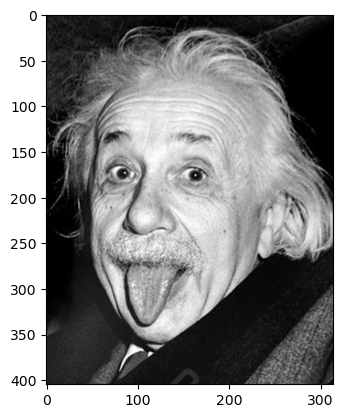

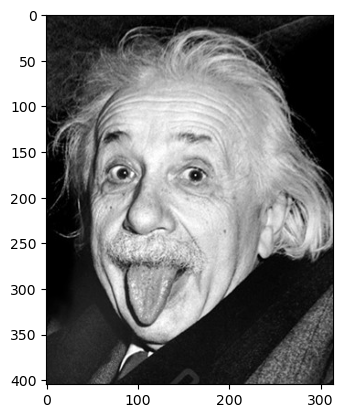

In [35]:
# import picture
pic = Image.open('MATLAB_data_files/einstein.jpg')

# let's have a look
plt.imshow(pic)
plt.show()

# we need to convert it to 2D floating-point precision
pic = np.array(pic)
pic = np.mean(pic,axis=2)
plt.imshow(pic,cmap='gray')
plt.show()

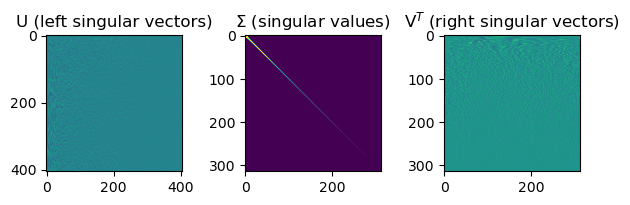

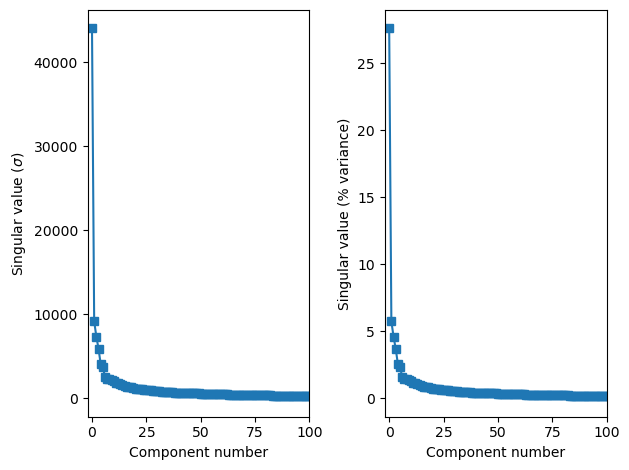

In [36]:
# SVD (singular value decomposition)

U,S,V = np.linalg.svd( pic )

# compute percent-variance explained sigmas
singvalspct = 100*S/sum(S)


_,axs = plt.subplots(1,3,figsize=(6,4))

# image the three matrices
axs[0].imshow(U)
axs[0].set_title('U (left singular vectors)')

axs[1].imshow(np.diag(S),vmin=0,vmax=200)
axs[1].set_title('$\Sigma$ (singular values)')

axs[2].imshow(V)
axs[2].set_title('V$^T$ (right singular vectors)')

plt.tight_layout()
plt.show()




# plot the spectrum
_,axs = plt.subplots(1,2)
axs[0].plot(S,'s-')
axs[0].set_xlim([-2,100])
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Singular value ($\sigma$)')

axs[1].plot(singvalspct,'s-')
axs[1].set_xlim([-2,100])
axs[1].set_xlabel('Component number')
axs[1].set_ylabel('Singular value (% variance)')

plt.tight_layout()
plt.show()

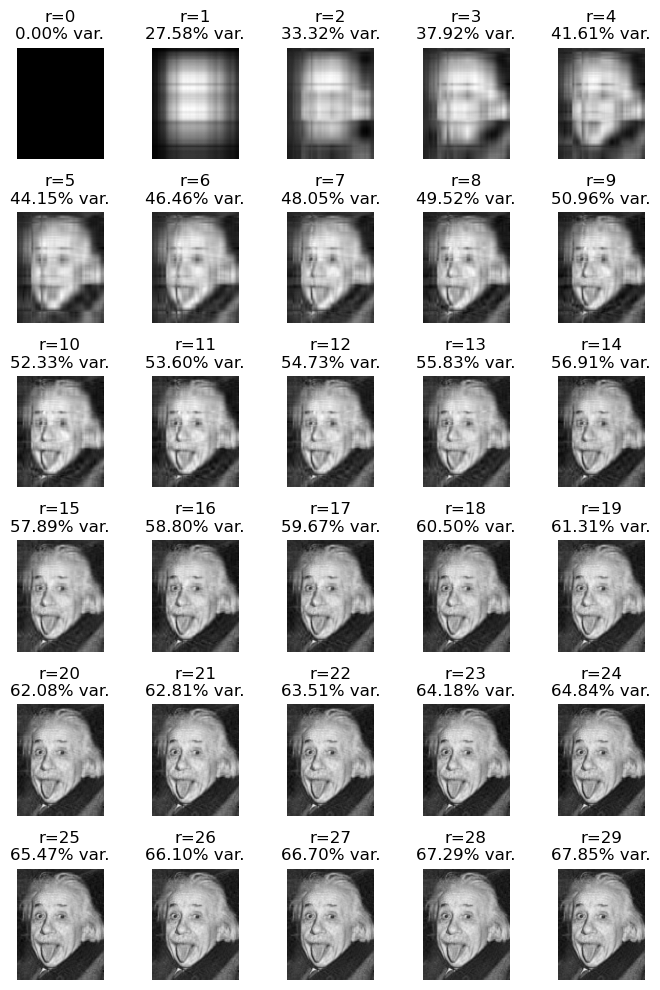

In [42]:
# reconstruct the image based on some components

#  The goal here is to recreate Einstein using a small number of the most
#   important feature dimensions.

fig,axs = plt.subplots(6,5,figsize=(7,10))

for i,ax in enumerate(axs.flatten()):
    
    # reconstruct the low-rank version of the picture
    lowapp = U[:,:i]@np.diag(S[:i])@V[:i,:]
    
    # compute its rank
    matrix_rank = np.linalg.matrix_rank(lowapp)
    
    # and visualize!
    ax.imshow(lowapp,cmap='gray')
    title = f'r={matrix_rank}\n{np.sum(singvalspct[:i]):.2f}% var.'
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()

# QUESTION: How many components / what percent variance do you need to
#           get a "good" (subjective) reconstruction of Einstein? 
#           Does this give you any hope for post-mortem resurrection??
